# Healthcare spending in the US and around the world
** Data Bootcamp Project **

Rohin Shah

Data Bootcamp - Fall 2016

N18978939

** Summary **

This notebook contains an analysis of healthcare spending in the U.S. and around the world (mostly limited to developed nations with highly sophisticated healthcare systems [Canada, the UK, Australia, Germany, Japan]). First, I analyzed healthcare spending across these different nations relative to the US, and then broke down the spending in the US by analyzing the efficiency of that spending. I looked at metrics such as healthcare employees and administrative expenses to see how efficient the US was in terms of healthcare spending relative to the rest of the world.

 ___

The cell below imports all the necessary data analysis packages (Matplotlib, Pandas, Seaborn, Statsmodels, etc.) and asks Python to return the version of each package that is installed.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import statsmodels.formula.api as smf
import pandas_datareader.data as web
from pandas_datareader import wb
%matplotlib inline

print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Matplotlib version: ', mpl.__version__)
print('Seaborn version: ', sns.__version__)

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Python version: 3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.19.0
Matplotlib version:  1.5.3
Seaborn version:  0.6.0


** Part 1 - Healthcare spending in the US and around the world **

The cell below imports the first two spreadsheets of the project which have data on private and public expenditures on healthcare for various countries (Germany, Canada, Japan, USA, UK and Australia). This data was found through the World Bank (link at end of notebook). The data could not be imported directly from the website because of the formatting and platform through which the data was presented.

After that, the code following sets the index equal to the year and sorts the data in chronological order. The next cell creates two graphs of this data using fig,ax and creates titles, axis labels and places the legend outside the graph.

In [2]:
# Every data set (Excel file) used in this notebook is located in a Github repository. The link is at the end.

pubspend = pd.read_csv("https://raw.githubusercontent.com/rohinshah/DataProject/master/Pub%20HC%20Spending%20by%20Country.csv")
privspend = pd.read_csv("https://raw.githubusercontent.com/rohinshah/DataProject/master/Priv%20HC%20Spending%20by%20Country.csv")

pubspend = pubspend.set_index("Year")
privspend = privspend.set_index("Year")

pubspend = pubspend.sort_index(axis=0,ascending=True)
privspend = privspend.sort_index(axis=0,ascending=True)

(0, 10)

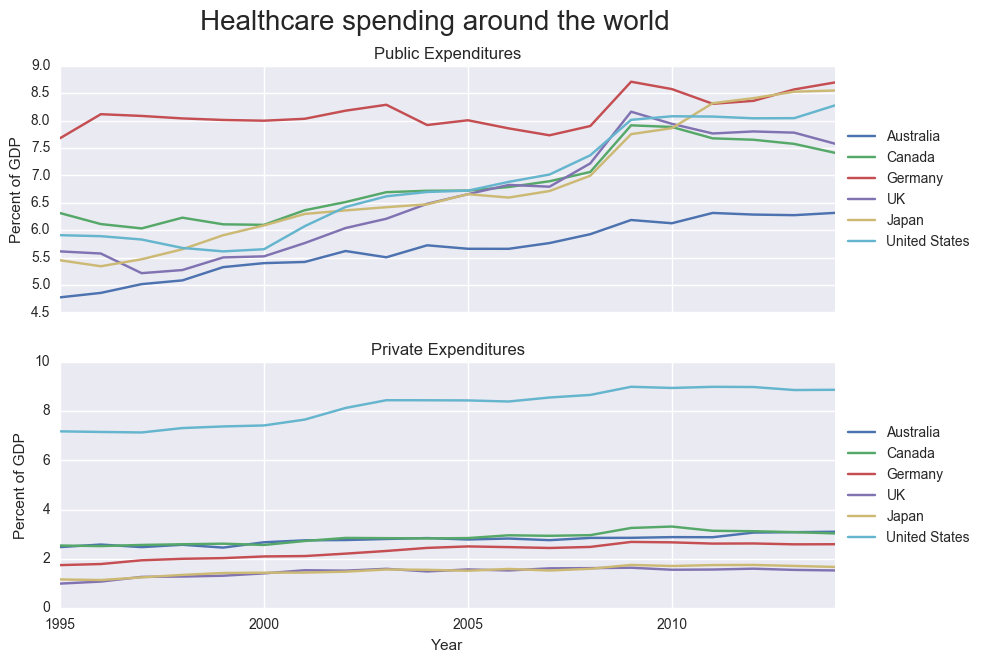

In [3]:
fig,ax = plt.subplots(2)

fig.suptitle("Healthcare spending around the world",fontsize=20)

pubspend.plot(ax=ax[0],figsize=(10,7),sharex=True)
ax[0].set_ylabel("Percent of GDP")
ax[0].set_title("Public Expenditures")
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

privspend.plot(ax=ax[1])
ax[1].set_ylabel("Percent of GDP")
ax[1].set_title("Private Expenditures")
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,10)

As you can see, the US government spends more than almost any other developed country on healthcare, which is mostly spent on programs such as Medicare and Medicaid (discussed below). The US also spends more private money on healthcare than any other country in the world, by a long shot. Furthermore, as these graphs show the data in terms of % of GDP, the magnitude of the difference is even larger - the US is the largest economy so a ~5% GDP difference is equal to roughly $900 billion. 

To analyze this a little deeper, I wanted to create a graph that showed the healthcare expenditures of the other nations in the dataset as a percent of US healthcare expenditures every year. To do this, I created a new dataframe (I created a new dataframe instead of appending it to the previous one to make the subsequent graphing code simpler) that summed up the public and private healthcare costs of each country, and another dataframe that took those expenditures and divided them by the US costs for that year. I then dropped the US column because the entire column had a value of 1. I then graphed this data below, setting axis labels and a title and changing the legend to be cleaner.

In [4]:
totalsum = pd.DataFrame()
countries = ["Australia","Canada","Germany","UK","Japan","United States"]

for each in countries:
    totalsum[each + " sum"] = pubspend[each] + privspend[each]

In [5]:
totalsum_p = pd.DataFrame()
for each in countries:
    totalsum_p[each + "% of US spending"] = totalsum[each + ' sum']/totalsum['United States sum']

totalsum_p.drop("United States% of US spending",axis=1,inplace=True)

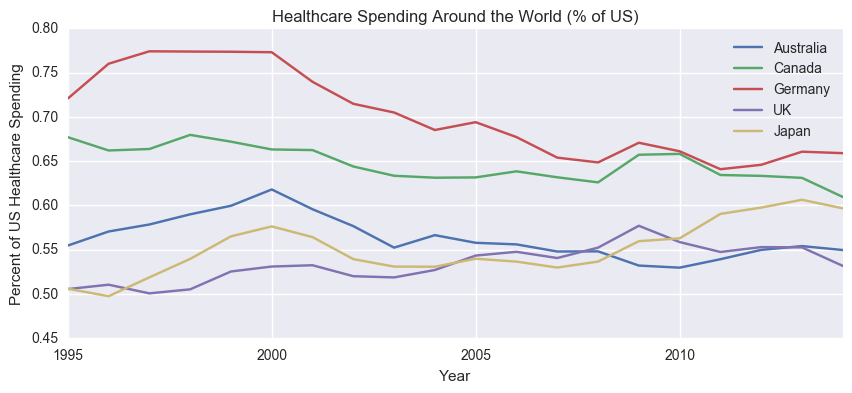

In [6]:
fig,ax = plt.subplots()

totalsum_p.plot(ax=ax,
                figsize=(10,4))
ax.set_title("Healthcare Spending Around the World (% of US)")
ax.set_ylabel("Percent of US Healthcare Spending")
ax.legend(labels=["Australia","Canada","Germany","UK","Japan",""],)

This shows that no country spends more than the US in healthcare. In fact, every nation spends a fraction of the US. From here, I wanted to isolate just the United States and analyze public v private healthcare expenditures. I did this by creating two new dataframes from the previous dataframes with US data and merging them togther into one dataframe. Then, I graphed this new dataframe and set axis labels, titles, legends and axis limits.

In [7]:
uspub=pubspend["United States"]
uspriv=privspend["United States"]

usspend = pd.concat([uspub,uspriv], axis = 1)
usspend.columns = ["Public","Private"]

(5, 10)

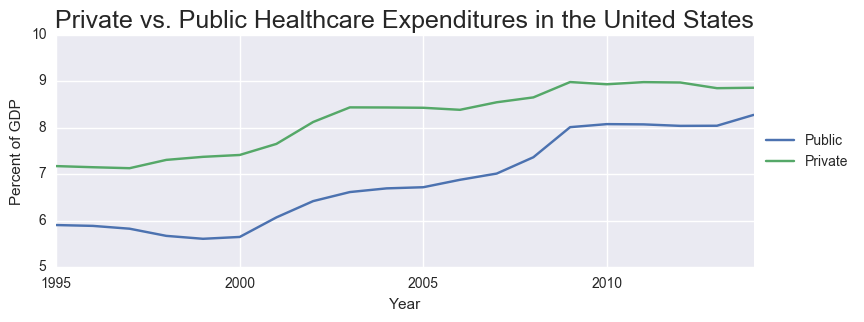

In [8]:
fig,ax = plt.subplots()

usspend.plot(ax=ax,figsize=(9,3),sharex=True)
ax.set_ylabel("Percent of GDP")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Private vs. Public Healthcare Expenditures in the United States",fontsize=18)
plt.ylim(5,10)

Clearly, the US spends a massive amount on healthcare - both public and private. This graph shows the separate pieces of US healthcare expenditures, equalling almost 18% of GDP by 2014.

** Part 2 - Life expectancy in the US and around the world **

Next, I wanted to analyze the effects of this spending. For this, I used life expectancy as a proxy for health. I downloaded data on life expectancy across the world from the same World Bank website (again, via an Excel rather than a URL due to the presentation of the data, which is the Github repository at the end of notebook). I cleaned up the dataframe by eliminating some of columns/rows and setting the index as the year, again.

In [9]:
lifex = pd.read_csv("https://raw.githubusercontent.com/rohinshah/DataProject/master/Life%20Expectancy.csv")
lifex.drop([0,1,2],axis=0,inplace=True)
lifex = lifex.set_index("Year")

However, I realized that the data was type(object) rather than type(float) meaning I couldn't graph the data because Python didn't recognize the values as numbers. The code below shows that initially, the data is all stores as objects.

In [10]:
# Old dtypes
lifex.dtypes

Australia         object
Canada            object
Germany           object
Japan             object
United Kingdom    object
United States     object
dtype: object

So, I had to use a string method to convert the data into float, as below. The cell below runs the previous code again and shows that the conversion was successful and the data is now in terms of floats. I had to create a new list ("countries2") because the original countries list used the syntax "UK" while the new dataset downloaded from the World Bank used the syntax "United Kindgom".

In [11]:
countries2 = ['Australia', 'Canada', 'Germany', "Japan", "United Kingdom" , 'United States']
lifex1 = pd.DataFrame()

for each in countries2:
    lifex1[each] = lifex[each].str.replace('', '').astype(float)

lifex1.dtypes

Australia         float64
Canada            float64
Germany           float64
Japan             float64
United Kingdom    float64
United States     float64
dtype: object

In [12]:
#lifex1 = lifex1.set_index("Year")

Then, I graphed the data to see trends in life expectancy across different countries across time.

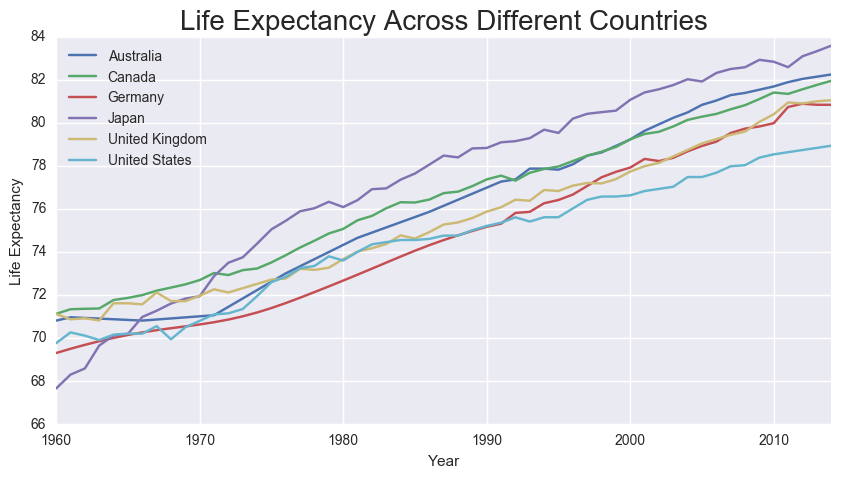

In [13]:
fig,ax=plt.subplots()
lifex1.plot(ax=ax,
            figsize=(10,5),
          kind="line")
ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
ax.set_title("Life Expectancy Across Different Countries",fontsize=20)

Clearly, people are living longer now than they were in 1960, as expected due to technology and advances in medicine. However, it is important and interesting to note that despite all of the US's healthcare spending as seen previously, the US now has the lowest life expectancy out of the sample of developed nations. That is interesting, as one would expect that higher healthcare spending would lead to the best healthcare outcomes, proxied by life expectancy. This data shows that assumption may not be 100% true.

** Part 3 - Is US healthcare spending efficient? Comparing US healthcare spending to life expectancy **

To analyze this further, I wanted to isolate just US life expectancy and US healthcare spending. So, I imported a new file of US life expectancy and US healthcare spending, indexed by year. I then graphed these two metrics on one figure, to show the result and trend over time. I had to create one figure and twin it, and then created axis labels, titles and legend attributes for each. I also changed the color manually to highlight the difference.

In [14]:
spendLE = pd.read_excel("https://github.com/rohinshah/DataProject/raw/master/Total%20Spending%20%26%20LE.xls")
spendLE = spendLE.set_index("Year")

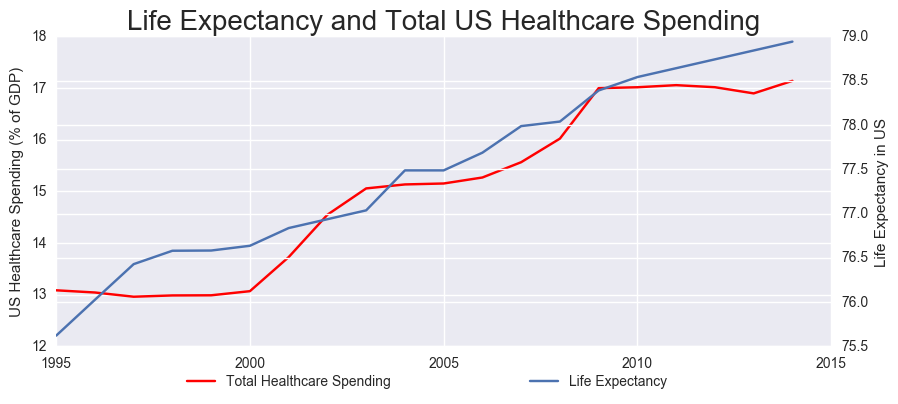

In [15]:
fig,ax = plt.subplots(figsize=(10,4))
ax1 = ax.twinx()

ax.plot(spendLE["Spending - USA"],
        color='red',
        label="Total Healthcare Spending")
ax.set_ylabel("US Healthcare Spending (% of GDP)")
ax.legend(loc='upper center', bbox_to_anchor=(0.3, -0.05))

ax1.plot(spendLE["LE - USA"],
         label="Life Expectancy")
ax1.set_ylabel("Life Expectancy in US")
ax1.legend(loc='upper center', bbox_to_anchor=(0.7, -0.05))    

ax.set_title("Life Expectancy and Total US Healthcare Spending",fontsize=20)

Clearly, US healthcare spending has a correlation to life expectancy. As healthcare spending has increased, so has life expectancy. However, this relationship is still ambigious and can be the result of many other confounding variables. To deduce further clarity, I ran a regression below to see the correlation between healthcare spending and life expectancy in the US, using the SMF package.

In [16]:
regression= smf.ols(formula="spendLE['LE - USA'] ~ spendLE['Spending - USA']", data = spendLE).fit()
print(regression.summary())

                             OLS Regression Results                            
Dep. Variable:     spendLE['LE - USA']   R-squared:                       0.926
Model:                             OLS   Adj. R-squared:                  0.922
Method:                  Least Squares   F-statistic:                     224.5
Date:                 Thu, 22 Dec 2016   Prob (F-statistic):           1.31e-11
Time:                         17:14:11   Log-Likelihood:                -2.0645
No. Observations:                   20   AIC:                             8.129
Df Residuals:                       18   BIC:                             10.12
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept   

The correlation between spending and life expectancy is very strong (92.6%) and is statistically significant. So, for every $1 of healthcare spending, it seems that life expectancy increases by 0.59 years. This regression shows that for the US, increased healthcare spending has paid off. Not only has life expectancy increased, but the marginal effect of every dollar of healthcare spending on life expectancy is quite high. However, it is important to note that there are MANY factors that determine health (education, poverty, economics, sanitation, nutrition, etc.) of which healthcare spending is only one. But, this regression shows with some clarity that healthcare spending is instrumental in increasing life expectancy and improving health outcomes.

Given the other confounding variables that weren't controlled for, it can be assumed that there is some portion of healthcare spending that is not responsible for the increase in life expectancy - in other words, can the 0.59 year life expectancy be generated by less than $1 of spending?

** Part 4 - Healthcare administration costs in the US and around the world **

However, how much of healthcare spending is actually on medicine and clinical items? Surely, there is some waste in the almost 18% of GDP that we spend on healthcare every year. 

To analyze this, I found another dataset from the OECD on administrative costs. This includes costs of para-professionals, scribes, non-clinical professionals and billing/insurance-related costs. This will remove the non-clinical costs from the clinical costs and show how much the US is spending on actually running the system compared to the rest of the world.

To do this, I read in a new Excel file and set the index, and then graphed it. I also set the axis labels and title.

In [17]:
admin = pd.read_csv("https://raw.githubusercontent.com/rohinshah/DataProject/master/Admin%20Costs.csv")
admin.set_index("Year",inplace=True)

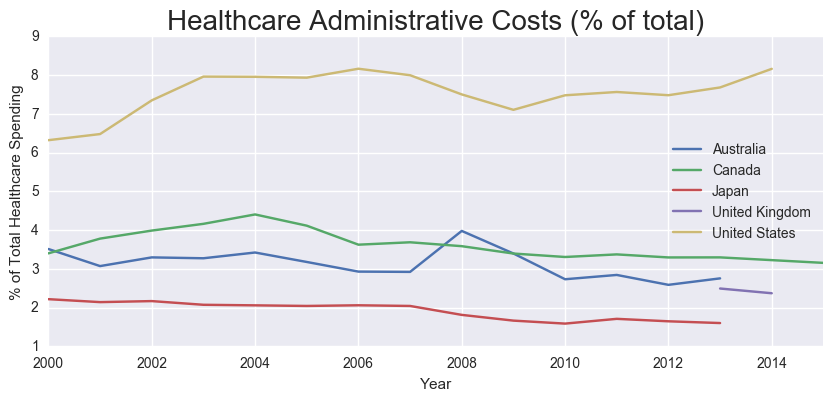

In [18]:
fig,ax=plt.subplots()

admin.plot(ax=ax,
           figsize=(10,4))
ax.set_title("Healthcare Administrative Costs (% of total)", fontsize=20)
ax.set_ylabel("% of Total Healthcare Spending")

Wow. The US spends almost 6% of total healthcare spending on administrative costs. This is more than any other developed country in the dataset, and almost double their average. This closely reflects the immense costs of navigating the extremely complicated US insurance system (which itself costs hospitals millions of dollars). The other nations in the dataset have centralized or highly simplified insurance systems, which removes a mssive cost from the system. This analysis shows that a lot of the money we spend on healthcare is wasted on adminstration and paperwork - stuff that can be eliminated by simplifying the system or automation. Furthermore, this is poised to increase dramatically when Obamacare is fully phased-in as consumers, hospitals, pharmacies, and health-care providers learn, adjust to and absorb all the new regulations placed upon them. By contrast, countries like Canada and Australia and further simplifying their systems, lowering their costs

In 2013 alone, the US paid almost 8% of all healthcare costs to just administrators, compared to 2-3% for all the other nations in the dataset. This shows that while healthcare spending is beneficial to life expectancy, we can cut down healthcare spending by up to 8% without reducing health outcomes (if you believe that administrative costs have no impact on actual health outcomes, as I do).

** Part 5 - Analyzing adminstrative costs through healthcare staff **

Why does the US spend so much on healthcare administration? I wanted to analyze this further so I found data on the number of medical professionals in each country over time. I found that data set from the OECD and read it in, as below. I then graphed this data, and again, set the axis labels and titles and axis limits.

In [19]:
staff = pd.read_csv("https://raw.githubusercontent.com/rohinshah/DataProject/master/HC%20Staff.csv")
staff = staff.set_index("Year")

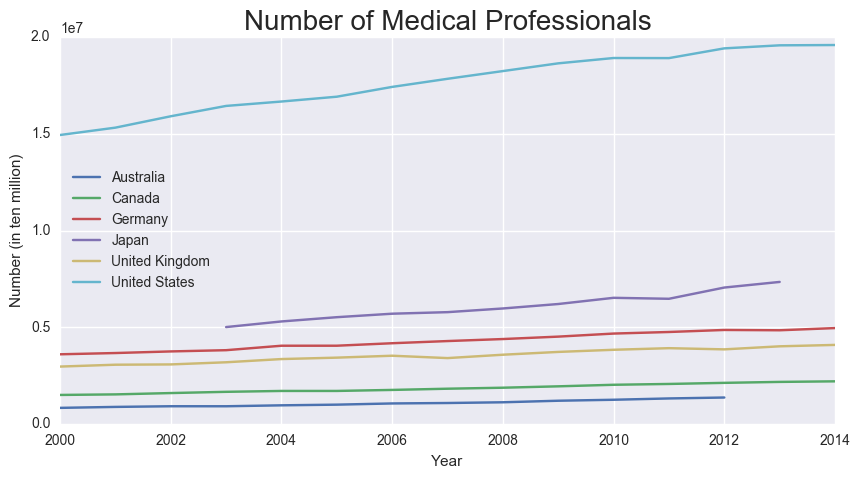

In [20]:
fig,ax=plt.subplots()

staff.plot(ax=ax,figsize=(10,5),
           xlim=(2000,2014))
ax.set_title("Number of Medical Professionals", fontsize=20)
ax.set_ylabel("Number (in ten million)")
ax.legend(loc='best')

Wow (again). The US employs almost triple the healthcare professionals as the rest of the world. More than 15 million people work in the healthcare industry, many of which are part of the bloated adminstration as seen above. By contrast, the UK employs 5 million people and Australia only employs about 1-2M people. Clearly we dont need this many healthcare professionals, and not all of them (maybe not even a majority) are involved in clinical practices. This again highlights how inefficient the US system is compared to the rest of the world.

** Part 6 - Days spent in the hospital in the US and around the world **

From here, I read in a few new files that contained World Bank data on days spent in hospital across different nations for various illnesses - all cases, acute myocardial infarction (heart attack), and prenancy. I wanted to compare, given the fact that the US spends more than any other nation on healthcare and has the most wasted administrative costs, how the quality of care is, proxied by the length of stay in the hopsital. I wanted to compare the data for all cases versus those for heart attacks and pregnancies, because they are relatively common hospital admissions that all nations in this data set have dealt with successfully for tens of years.

To do this, I read in three new files and reset the index on them to be the year, and dropped the data for Japan and the United Kindgom because they contained relatively few data points due to lack of data.

In [21]:
days_all = pd.read_excel("https://github.com/rohinshah/DataProject/raw/master/Days%20in%20Hospital.xls",
                  sheetname='All')

days_all = days_all.set_index("Year")
days_all = days_all.drop(["Japan","United Kingdom"],axis=1)

days_AMI = pd.read_excel("https://github.com/rohinshah/DataProject/raw/master/Days%20in%20Hospital.xls",
                  sheetname='AMI')

days_AMI = days_AMI.set_index("Year")
days_AMI = days_AMI.drop(["Japan","United Kingdom"],axis=1)

days_pregnancy = pd.read_excel("https://github.com/rohinshah/DataProject/raw/master/Days%20in%20Hospital.xls",
                  sheetname='Pregnancy')

days_pregnancy = days_pregnancy.set_index("Year")
days_pregnancy = days_pregnancy.drop(["Japan","United Kingdom"],axis=1)

Then, I created three plots graphing, against time, days spent in the hospital for all illnesses, for heart attacks and for pregnancies. I set the axis limits, axis names and titles and created one common legend for all the plots.

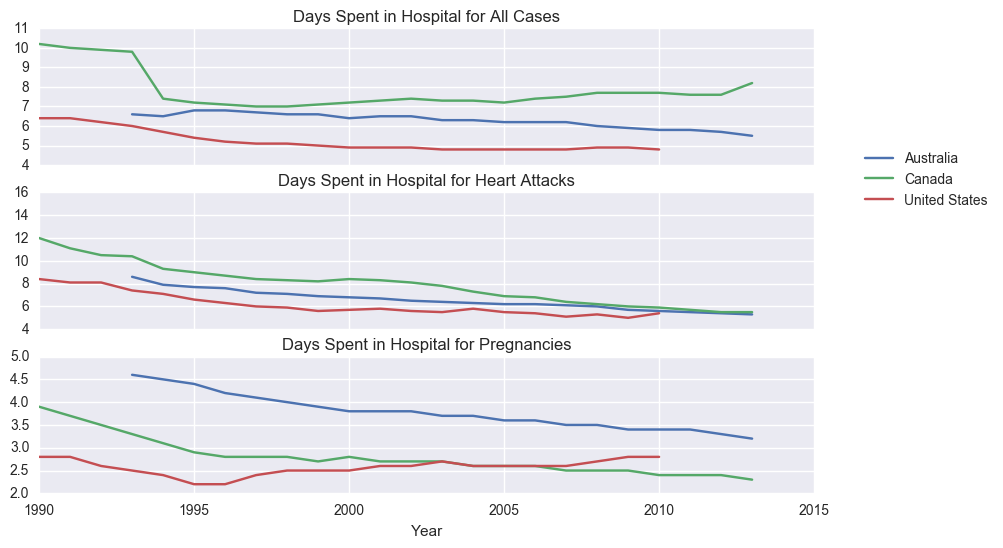

In [22]:
fig,ax = plt.subplots(3,figsize=(10,6))

days_all.plot(ax=ax[0],
              sharex=True,
              xlim=(1990,2015),
              legend=False)
ax[0].set_title("Days Spent in Hospital for All Cases")

days_AMI.plot(ax=ax[1],
              xlim=(1990,2015),
             legend=False)
ax[1].set_title("Days Spent in Hospital for Heart Attacks")

days_pregnancy.plot(ax=ax[2],
              xlim=(1990,2015),
                   legend=False)
ax[2].set_title("Days Spent in Hospital for Pregnancies")

plt.legend(bbox_to_anchor=(1.05, 2), loc='lower left')

Clearly, we can see that in all three cases, for most years, patients in the US spend the least days in the hospital relative to Canada and Australia. This means that the added costs that the US bears (publicly and privately) on healthcare is not due to longer hospital visits. Instead, these extra costs are explained by a third variable not examined here. Unsurprisingly, we can also see that hospital stays have become shorter over time as hospitals get more technology, medical education improves and doctor's training gets more sophisticated.

Next, I wanted to compare this data another way visually, via a histogram. I wanted to see across all time, the frequency of each bucket of hospital stay lengths across time for all illnesses. I wanted to compare that to the other nations by overlaying line graphs (kernel density estimates) for the other nations on top of the histogram of the US. To do this, I created KDE plots for the US, Canada and Australia and then craeted a histogram for the US, and altered the color of the bars and the labels of the axis and series and title. I also then created one common legend and re-named some of the axis to name it clearer.

/Users/sglyon/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/sglyon/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/sglyon/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


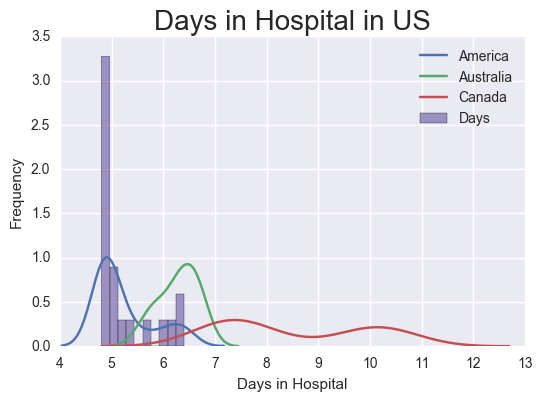

In [24]:
fig,ax = plt.subplots()

sns.kdeplot(days_all["United States"],ax=ax)
sns.kdeplot(days_all["Australia"],ax=ax)
sns.kdeplot(days_all["Canada"],ax=ax)

days_all["United States"].plot(kind="hist",
                               alpha=0.75,
                               normed=True,
                               label="Days in the US")
ax.set_xlabel("Days in Hospital")
ax.set_title("Days in Hospital in US",fontsize=20)

ax.legend(labels=["America","Australia","Canada","Days"],)

As we can see here, patients in the US have remarkably shorter hospital stays than Canada or Australia. The mean is around 5 days, whereas the mean in Canada is around 8 and in Australia, the mean is 6. This means that the US is spending more on healthcare but the average patient is spending less time in the hospital. 

** Part 7 - Is public insurance to blame? Analyzing the role of Medicare and Medicaid in US healthcare spending **

Finally, I wanted to do my last analysis on just the US. Given that the US spends more than the rest of the world, I wanted to analyze this paradigm further. Obviously, the US healthcare system faces a massive burden from Medicare and Medicaid, which are government sponsored insurance programs for the elderly and poor, respectively. I wanted to see, using government data, if the length of hospital stays varied at all depending on the type of insurance (public or private or none) that the patient had.

To do this, I read in my last file and changed the index of it, and the top of it is below. I then created a new dataframe with only one number: the average of the length of stay column so I could see the mean time spent in the hospital for all patients. Then, I created a graph of the length of stay for patients with different types of insurance programs to see if there was any difference relating to the type of insurance they had. Then, for comparison, I overlaid another line on top of that bar graph to show the average days spent in the hospital for ALL patients (regardless of insurance type) and added some attributes to the line such as color, a small annotation, making it dashed, increasing the weight and adding titles to the axis and graph.

In [25]:
outcomes = pd.read_csv("https://raw.githubusercontent.com/rohinshah/DataProject/master/Outcomes.csv")
outcomes.set_index("Type",inplace=True)
outcomes.head()

,Total number of discharges,Total number of discharges (%),"LOS (length of stay), days (mean)","Charges, $ (mean)","Costs, $ (mean)"
Type,,,,,
Medicare,"13,795,116",39.0%,5.3,"49,651","12,790"
Medicaid,"7,993,545",22.6%,4.5,"33,538","8,906"
Private insurance,"10,833,048",30.6%,3.9,"38,115","10,161"
Uninsured,"1,650,461",4.7%,4.1,"34,953","8,778"
Other,"1,019,269",2.9%,4.6,"45,399","11,841"


Average Length of Stay Across all Insurance = 4.5


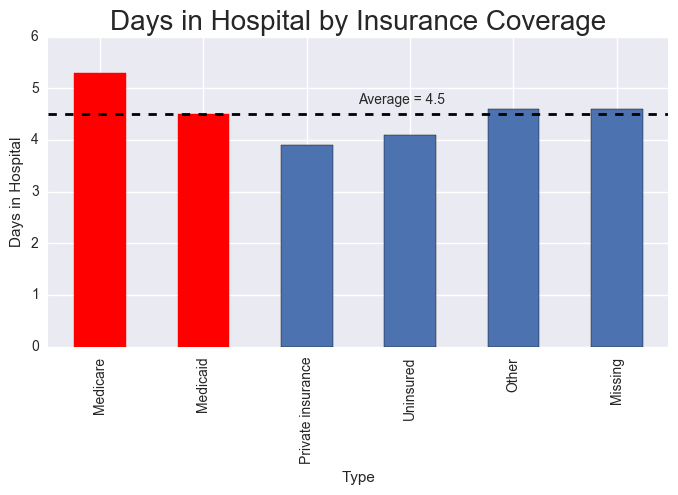

In [26]:
fig,ax = plt.subplots()

avgoutcomes = outcomes["LOS (length of stay), days (mean)"].mean()
print("Average Length of Stay Across all Insurance =",avgoutcomes)

outcomes["LOS (length of stay), days (mean)"].plot(ax=ax,
                                                  kind="bar",
                                                   figsize=(8,4))
xmin, xmax = ax.get_xlim()
ax.hlines(avgoutcomes, xmin, xmax, linewidth=2, linestyle='dashed')
ax.set_ylabel("Days in Hospital")
ax.set_title("Days in Hospital by Insurance Coverage", fontsize=20)
plt.text(2.5,4.7,"Average = 4.5")

ax.get_children()[1].set_color('r')
ax.get_children()[2].set_color('r')

Here, we can see that Medicare and Medicaid patients experience longer hospital stays than the privately or un-insured. This is interesting, because these patients generally are less profitable, so hospitals have a perverse incentive to keep them the shortest. However, there must be another variable at work here explaining this trend. However, the longer stays for publicly insured patients means that the government needs to spend more money on their hospital stays and healthcare, which can partially explain the very high public expenditure of the US government on healthcare. Because publicly insured patients are more expensive, the US government has to pay more for their care, running up the public bill on healthcare.

** Part 8 - Conclusion **

The analysis above shows a few key takeaways:

* The US spends more than the rest of the world on healthcare, in both public and private expenditures.
* Total US healthcare spending is approaching ~18% of GDP. 
* Life expectancy is also rising, but the US has the lowest life expectancy in the dataset of developed countries, despite the highest spending on healthcare
* Total spending has increased at a faster clip than life expectancy - although there is a 93% correlation between increased spending and life expectancy.
* US healthcare administrative costs are the highest in the world and are the highest percentage of total healthcare costs in the dataset.
* Some of this is due to the fact that the US has almost 3x more healthcare professionals than the rest of the world.
* Furthermore, US patients have the shortest hospital stays in the world, showing that the high healthcare costs in the US are due to something other than longer stays or better care.
* Medicare and Medicaid patients on average spend longer at the hospital than the privately insured, increasing the healthcare cost burden on the government.

---

# Sources

[Github repository with datasets](https://github.com/rohinshah/DataProject)

[World Bank data](http://data.worldbank.org)

[OECD data](http://stats.oecd.org)

[Data on healthcare by insurance status](http://hcupnet.ahrq.gov/HCUPnet.jsp)